In [1]:
import time
now = time.time()

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_dataset = pd.read_csv('DataSets/DatasetsCreated/train_dataset.csv')
train_dataset.shape

(1015389, 65)

In [4]:
test_dataset = pd.read_csv('DataSets/DatasetsCreated/test_dataset.csv')
test_dataset.shape

(113640, 61)

In [5]:
test_dataset = test_dataset.replace([np.inf, -np.inf], 0)
test_dataset.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Discount,Original_price,Discounted_price,Rate,...,LastRedemption,LastMerchantVisit,LastMerchantRedemption,LastMerchantUserVisit,LastCouponUserVisit,FirstTimeUser,FirstTimeMerchant,FirstTimeCoupon,FirstTimeMerchantUser,FirstTimeCouponUser
0,4129537,450,9983,"[30, 5, 0.833]",1.0,2016-07-12,30:5,30,5,0.833,...,NaN,12.0,12.0,NaN,NaN,0,1,0,0,0
1,6949378,1300,3429,"[30, 5, 0.833]",NaN,2016-07-06,30:5,30,5,0.833,...,NaN,7.0,13.0,NaN,NaN,1,1,0,0,0
2,2166529,7113,6928,"[200, 20, 0.9]",5.0,2016-07-27,200:20,200,20,0.900,...,31.0,27.0,28.0,NaN,NaN,1,1,1,0,0
3,2166529,7113,1808,"[100, 10, 0.9]",5.0,2016-07-27,100:10,100,10,0.900,...,28.0,27.0,28.0,NaN,NaN,1,1,1,0,0
4,6172162,7605,6500,"[30, 1, 0.967]",2.0,2016-07-08,30:1,30,1,0.967,...,8.0,8.0,8.0,NaN,NaN,1,1,1,0,0


In [6]:
type(test_dataset['Original_price'][1])

numpy.int64

## Categorical Data

In [7]:
# categorical_features = ['Tag', 'Purchaser', 'Merchant_Popular']
# for feature in categorical_features:
#     train_dataset[feature] = pd.Categorical(train_dataset[feature])

# One Hot Encoding
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['Tag'], prefix='Tag',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['DayOfWeek'], prefix='DayOfWeek',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)


In [8]:
train_dataset.columns

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date', 'Count', 'Discount', 'Original_price',
       'Discounted_price', 'Rate', 'Tag', 'User_Released', 'User_Redeemed',
       'User_Ratio', 'User_Buys', 'Purchaser', 'UserMerchantCount', 'DayList',
       'User_Redeemed_Buy', 'Merchant_Redeemed', 'Merchant_Ratio',
       'Merchant_AvgDistance', 'Merchant_Popular', 'Merchant_AvgRate',
       'AvgDailyUsers', 'VisitList', 'UniqueUsersCount', 'Merchant_Buys',
       'MerchantRedemptionList', 'Merchant_Redeemed_Buy', 'Coupon_Released',
       'Coupon_Redeemed', 'Coupon_Ratio', 'Duration', 'RedemptionList',
       'ReleasesCount', 'ImpDay', 'Weekend', 'DayOfWeek', 'Visits',
       'User_Merchant_Ratio', 'User_Coupon_Redeemed', 'User_Coupon_Ratio',
       'Discounted_Redeemed', 'User_discount_Ratio', 'Merchant_User_Visit',
       'Coupon_User_Visit', 'DateTrack', 'First_day', 'DayNum',
       'LastUserVisit', 'LastRedemption', 'LastMerchant

## Final Features

In [9]:
remove_columns = ['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate','Discount','Date_received',
                  'Date','Count','RedemptionDuration','DayList','DateTrack','DayNum','First_day',
                  'RedemptionList','VisitList', 'Merchant_User_Visit', 'MerchantRedemptionList',
                  'User_Coupon_Redeemed', 'User_Coupon_Ratio','User_discount_Ratio','Discounted_Redeemed','Coupon_User_Visit']
unimportant_features = ['DayOfWeek','Weekend','ImpDay','Merchant_Popular','Purchaser']
features = list(set(train_dataset.columns)-set(remove_columns)-set(['Target'])-set(unimportant_features))
print('Features to be included:'+str(len(features)))                  
print(features)

Features to be included:37
['LastMerchantUserVisit', 'Merchant_Ratio', 'Rate', 'Coupon_Ratio', 'Merchant_Buys', 'ReleasesCount', 'User_Merchant_Ratio', 'Merchant_AvgDistance', 'Merchant_Redeemed_Buy', 'UniqueUsersCount', 'Discounted_price', 'Distance', 'LastRedemption', 'User_Redeemed_Buy', 'FirstTimeMerchantUser', 'Tag', 'LastMerchantRedemption', 'Visits', 'Original_price', 'Merchant_AvgRate', 'Duration', 'Coupon_Released', 'LastUserVisit', 'User_Buys', 'UserMerchantCount', 'User_Released', 'FirstTimeCoupon', 'LastMerchantVisit', 'User_Redeemed', 'Coupon_Redeemed', 'LastCouponUserVisit', 'User_Ratio', 'Merchant_Redeemed', 'FirstTimeUser', 'FirstTimeMerchant', 'FirstTimeCouponUser', 'AvgDailyUsers']


# Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score


In [11]:
def save_model(model):
    #saving model
    from sklearn.externals import joblib 

    # Save the model as a pickle in a file 
    joblib.dump(model, 'Model/xgboost.pkl') 

    # Load the model from the file 
    clf_saved= joblib.load('Model/xgboost.pkl')  


In [12]:
y = list(train_dataset['Target'])
X = train_dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=100)

### XGBoost

In [13]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.feature_selection import RFECV
# params = {
#         'min_child_weight': [1,2],                       #[1,2,3,4,5],
#         'gamma': [0.5],                                  #[0,0.5, 1, 1.5, 2, 5],
#         'subsample': [0.8],                              #[0.6, 0.8,1.0],
#         'colsample_bytree': [0.8],                       #[0.6, 0.8,1.0],
#         'max_depth': [5],                                #[3,4,5],
#         'learning_rate': [0.1],                          #[0.01,0.05,0.1,0.5],
#         'scale_pos_weight': [1],                         #[1],                 
#         'alpha': [0.2]                                   #[0.1,0.2,0.3,0.4,0.5]
#         }
# clf = XGBClassifier(n_estimators=500, objective='binary:logistic',
#                     silent=True, nthread=1)
# grid_search = GridSearchCV(estimator = clf,
#                            param_grid = params,
#                            scoring = 'roc_auc',
# #                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train[features], y_train)
# grid_search.best_params_

In [14]:
def train_model():

    clf = XGBClassifier(
     n_estimators=500,
     objective= 'binary:logistic',
     nthread=3,
     scale_pos_weight=1,
     seed=410,
     alpha=0.2,
     colsample_bytree=0.8,
     gamma=1,
     learning_rate=0.1,
     max_depth=5,
     min_child_weight=5,
     subsample=0.8)
    
    model = clf.fit(X_train[features], y_train)
#     save_model(model)
    
    ax = plot_importance(model)
    fig = ax.figure
    fig.set_size_inches(15, 9)
    plt.show()

    return model


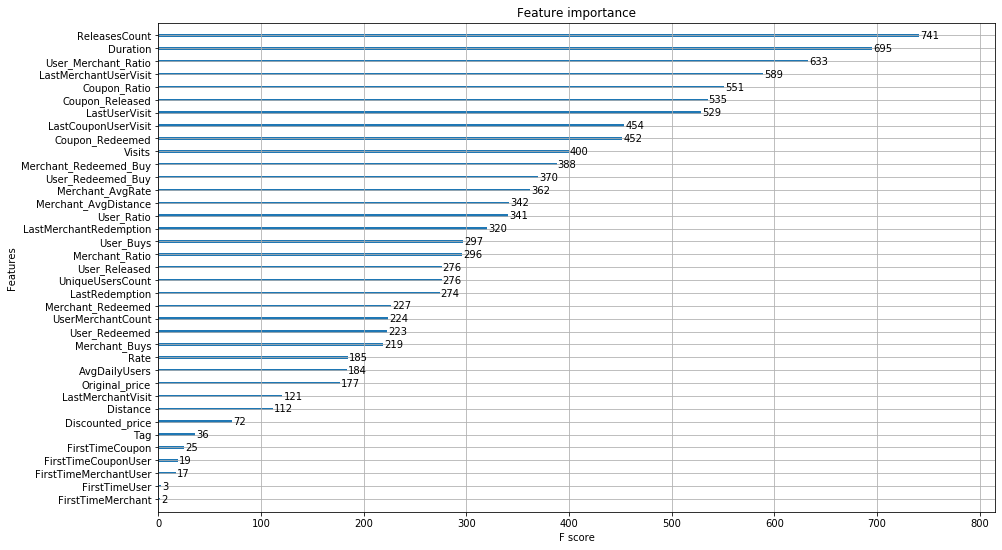

In [15]:
model = train_model()

In [16]:
# feature_importances = pd.DataFrame(model.feature_importances_,index = features,columns=['importance']).sort_values('importance',ascending=True)
# feature_importances.plot(kind='barh',figsize=(10,20))

In [17]:
def evaluate_model(X_check, y_check):
    
    
    predictions = (model.predict_proba(X_check[features])[:,1]).tolist()
    predicted_values = (model.predict(X_check[features])).tolist()
    dataset = X_check.copy()
    dataset['Probability'] = [round(i, 6) for i in predictions]
    output = dataset[['User_id','Merchant_id','Date_received','Probability']]
    
    

    roc_score = round(roc_auc_score(y_check, predictions), 3)

    print('ROC AUC Score of Probailities:  '+ str(roc_score))
    print('ROC AUC Curve')
    fpr, tpr, _ = metrics.roc_curve(y_check, predictions)
    auc = metrics.roc_auc_score(y_check, predictions)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    predicted_values = [1 if x>0.5 else 0 for x in predictions]
    print('______________________________________________________________________')
    print('\n The classification report for the model:')
    print(classification_report(y_check, predicted_values) )
    
    results = confusion_matrix(y_check, predicted_values) 
    print('______________________________________________________________________')
    print('\n The confusion matrix for the model:')
    print(results)
    print('______________________________________________________________________')
    
#     threshold = np.arange(0,1,0.001)
#     precision = np.zeros(len(threshold))
#     recall = np.zeros(len(threshold))
#     for i in range(len(threshold)):
#         y1 = np.zeros(len(y_check),dtype=int)
#         y1 = np.where(predictions<=threshold[i],0,1)
#         precision[i] = precision_score(y_check,y1)
#         recall[i] = recall_score(y_check,y1)

#     plt.figure(figsize=(12,9))
#     sns.set_style('whitegrid')
#     sns.lineplot(x=threshold,y=precision)
#     sns.lineplot(x=threshold,y=recall)
#     plt.xlabel('Threshold')
#     plt.title('Recall and Precision Values Vs Threshhold values')
#     plt.show()
    
    return output, dataset
    

## Validation Data Scores

ROC AUC Score of Probailities:  0.994
ROC AUC Curve


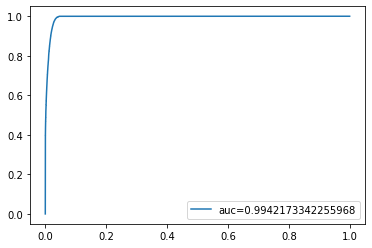

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    121682
           1       0.80      0.84      0.82      7780

    accuracy                           0.98    129462
   macro avg       0.90      0.91      0.90    129462
weighted avg       0.98      0.98      0.98    129462

______________________________________________________________________

 The confusion matrix for the model:
[[120064   1618]
 [  1261   6519]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probability
373670,2719236,2709,2016-05-18,0.000002
80538,585881,2709,2016-02-02,0.000002
418232,3041043,1433,2016-02-11,0.000003
683806,4965863,8580,2016-03-30,0.000002
466008,3386708,3381,2016-01-23,0.000001


In [18]:
val_output, val_data = evaluate_model(X_val, y_val)
val_output.head()

### Analysing Validation Data results

In [19]:
val_data[(val_data['Target']==0)&(val_data['Probability']>0.5)]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count,Discount,Original_price,...,LastMerchantUserVisit,LastCouponUserVisit,RedemptionDuration,Target,FirstTimeUser,FirstTimeMerchant,FirstTimeCoupon,FirstTimeMerchantUser,FirstTimeCouponUser,Probability
656531,4766520,1390,7996.0,"[10, 1, 0.9]",2,2016-04-20,2016-05-10,1,10:1,10,...,10.0,6.0,20,0,1,1,1,1,1,0.528805
356541,2594980,7555,17.0,"[30, 5, 0.833]",1,2016-01-23,2016-02-12,1,30:5,30,...,NaN,NaN,20,0,0,1,0,0,0,0.576844
999583,7247230,5341,11539.0,"[30, 5, 0.833]",0,2016-02-03,2016-02-26,1,30:5,30,...,NaN,NaN,23,0,0,1,1,0,0,0.693941
584185,4244370,5341,111.0,"[30, 5, 0.833]",0,2016-02-07,2016-02-29,1,30:5,30,...,NaN,NaN,22,0,0,1,1,0,0,0.592834
990459,7181519,6614,3444.0,"[20, 5, 0.75]",0,2016-03-26,2016-12-01,2,20:5,20,...,NaN,NaN,250,0,0,1,1,0,0,0.762609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993028,7200017,8660,12080.0,"[20, 5, 0.75]",2,2016-03-26,2016-12-01,1,20:5,20,...,NaN,NaN,250,0,0,1,1,0,0,0.757647
567259,4122740,7243,1695.0,"[150, 20, 0.867]",5,2016-05-19,2016-06-22,1,150:20,150,...,6.0,6.0,34,0,1,1,0,1,1,0.669635
543270,3952628,6316,8611.0,"[30, 5, 0.833]",0,2016-05-19,2016-06-17,1,30:5,30,...,NaN,NaN,29,0,1,1,1,0,0,0.756204
327591,2386694,5152,11781.0,"[30, 5, 0.833]",0,2016-05-22,2016-12-01,1,30:5,30,...,NaN,NaN,193,0,1,1,0,0,0,0.733663


In [20]:
val_data[(val_data['Target']==0)&(val_data['Probability']>0.5)][features]['User_Merchant_Ratio'].describe()

count    1618.000000
mean        0.745411
std         0.247928
min         0.076923
25%         0.500000
50%         0.750000
75%         1.000000
max         1.000000
Name: User_Merchant_Ratio, dtype: float64

In [21]:
val_data[(val_data['Target']==0)&(val_data['Probability']<0.5)][features]['User_Merchant_Ratio'].describe()

count    120064.000000
mean          0.014662
std           0.083546
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: User_Merchant_Ratio, dtype: float64

In [22]:
val_data[(val_data['Target']==1)&(val_data['Probability']<0.5)][features]

,LastMerchantUserVisit,Merchant_Ratio,Rate,Coupon_Ratio,Merchant_Buys,ReleasesCount,User_Merchant_Ratio,Merchant_AvgDistance,Merchant_Redeemed_Buy,UniqueUsersCount,...,LastMerchantVisit,User_Redeemed,Coupon_Redeemed,LastCouponUserVisit,User_Ratio,Merchant_Redeemed,FirstTimeUser,FirstTimeMerchant,FirstTimeCouponUser,AvgDailyUsers
1001294,25.0,0.05,0.900,0.05,22,2832,0.500000,4.428571,0.045455,9,...,4.0,1.0,1,25.0,0.17,1.0,1,1,1,1.100000
490341,73.0,0.15,0.750,0.15,367,2694,0.500000,3.162461,0.125341,168,...,1.0,3.0,13,11.0,0.43,46.0,1,1,1,2.367742
809214,16.0,0.07,0.833,0.03,4606,3614,0.400000,0.542855,0.100304,2896,...,1.0,2.0,73,NaN,0.33,462.0,1,1,0,25.291209
563727,1.0,0.13,0.950,0.13,1106,2992,0.500000,2.000000,1.000000,7424,...,1.0,2.0,90,3.0,0.40,1106.0,1,1,1,15.628571
229937,12.0,0.37,0.900,0.55,1814,5054,0.333333,1.017306,0.369350,559,...,1.0,1.0,258,NaN,0.17,670.0,1,1,0,11.874172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725226,NaN,0.10,0.700,0.02,1212,11161,0.333333,2.582256,0.311881,1797,...,1.0,2.0,6,NaN,0.33,378.0,1,1,0,6.662983
88641,25.0,0.02,0.833,0.05,12275,1941,0.500000,3.448650,0.118208,53073,...,1.0,1.0,57,NaN,0.33,1451.0,1,1,0,67.324176
50676,100.0,0.19,0.800,0.21,1161,13223,0.500000,4.362074,0.413437,1934,...,1.0,1.0,468,88.0,0.14,480.0,1,1,1,7.394904
773889,NaN,0.18,0.950,0.20,20,10959,0.333333,5.205882,0.150000,10,...,2.0,2.0,3,1.0,0.22,3.0,1,1,1,1.111111


In [23]:
val_data['FirstTimeMerchant'].sum()/val_data.shape[0]

0.99384375337937

In [24]:
train_dataset['FirstTimeMerchant'].sum()/train_dataset.shape[0]

0.9938161630665686

In [25]:
train_dataset.shape[0]

1015389

## Test Data Scores

ROC AUC Score of Probailities:  0.994
ROC AUC Curve


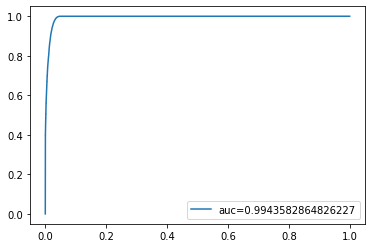

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    142942
           1       0.81      0.84      0.82      9367

    accuracy                           0.98    152309
   macro avg       0.90      0.91      0.91    152309
weighted avg       0.98      0.98      0.98    152309

______________________________________________________________________

 The confusion matrix for the model:
[[141092   1850]
 [  1502   7865]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probability
715091,5193451,7555,2016-04-16,0.000001
936313,6788567,3527,2016-03-22,0.000002
935861,6785479,450,2016-02-02,0.000002
73628,536792,1375,2016-05-13,0.000002
810548,5882244,4860,2016-02-07,0.000003


In [26]:
test_output, test_data = evaluate_model(X_test, y_test)
test_output.head()

In [27]:
# def training2(train_dataset):
#     y = list(train_dataset['Target'])
#     X = train_dataset[features]
#     data_dmatrix = xgb.DMatrix(data=X, label=y)
#     params =  {'objective':'binary:logistic','colsample_bytree':0.8,'learning_rate':0.1,
#                 'max_depth':5}
#     cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50,
#                         early_stopping_rounds=10, as_pandas=True, seed=0,  metrics='auc') 
#     return cv_results
    
# training2(train_dataset)

# Test Dataset and Submission File

In [28]:
predictions = (model.predict_proba(test_dataset[features])[:,1]).tolist()
predicted_values = (model.predict(test_dataset[features])).tolist()
test = pd.merge(test_dataset[features], test_dataset[['User_id','Merchant_id','Date_received']]
                , how='left',left_index=True,right_index=True)
test['Probability'] = [round(i, 6) for i in predictions]
output = test[['User_id','Merchant_id','Date_received','Probability']]

output[output['Probability']>0.5]

,User_id,Merchant_id,Date_received,Probability
178,2773771,7422,2016-07-25,0.974254
274,3913489,760,2016-07-04,0.508599
511,6879802,7221,2016-07-05,0.672198
512,6879802,7221,2016-07-07,0.665980
646,2741029,6135,2016-07-06,0.832863
...,...,...,...,...
112916,6179153,3770,2016-07-06,0.949170
112997,4384097,760,2016-07-01,0.519886
113334,7121333,7397,2016-07-10,0.551969
113452,4459985,2436,2016-07-26,0.519418


In [29]:
output.to_csv('OutputFile.csv',index=False) 


In [30]:
test[(test['Probability']<0.2) & (test['LastMerchantUserVisit'].isna()!=False)].shape

(87882, 41)

# Execution Time of this notebook

In [31]:
later = time.time()
difference = later - now
print('Time taken for the execution of this notebook: '+str(round(difference/60,2))+' mins')

Time taken for the execution of this notebook: 26.3 mins
